In [170]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [171]:
# Reference:
# https://stackoverflow.com/questions/44047819/increase-image-brightness-without-overflow/44054699#44054699

In [172]:
def load(path, display=True):
    img_crowd = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

    if display:
        plt.figure(figsize = [10, 10])
        plt.axis('off')
        plt.imshow(img_crowd, cmap='gray')

    return img_crowd

[[150 148 151 ... 147 152 152]
 [150 149 149 ... 145 149 151]
 [156 164 149 ... 149 151 147]
 ...
 [149 151 154 ... 141 142 133]
 [153 155 157 ... 139 131 130]
 [148 150 152 ... 135 126 133]]


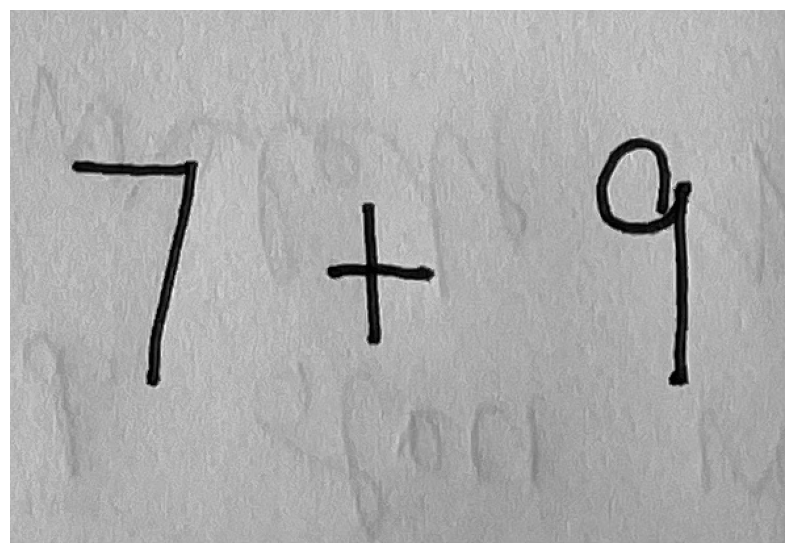

In [173]:
img = load('../equation-dataset/06_eq.png')
print(img)

In [174]:
def remove_shadows(img):
    # Generate the shadow of the image
    # Create a 9x9 kernel, can also use np.ones()
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 9))

    # Some morphology operators
    # https://docs.opencv.org/3.4/db/df6/tutorial_erosion_dilatation.html 
    # https://docs.opencv.org/3.4/d3/dbe/tutorial_opening_closing_hats.html
    shadow = cv2.dilate(img, kernel) # Make the background bleed into the text to cover it up

    # Filtering
    # https://docs.opencv.org/3.4/dc/dd3/tutorial_gausian_median_blur_bilateral_filter.html
    shadow = cv2.medianBlur(shadow, 21) # Use a median filter to cover up the text entirely (there may still be particles in the text), now we have an image with only the shadow

    res = 255 - cv2.absdiff(img, shadow) # Remove the shadow from the original image
    return res

# Results

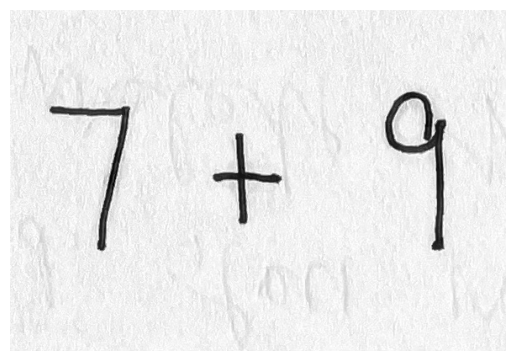

In [175]:
img = remove_shadows(img)
plt.axis('off')
plt.imshow(img, cmap='gray')

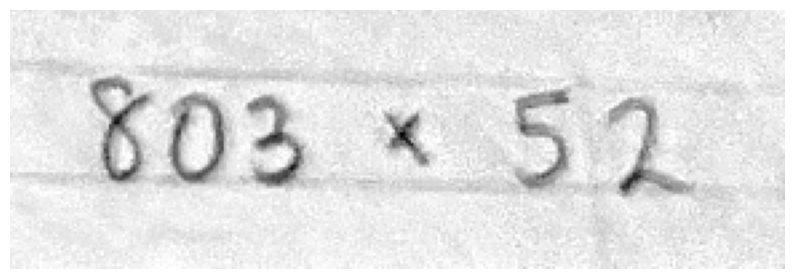

In [176]:
img = load('../equation-dataset/dark-background/6.png')
img = remove_shadows(img)
plt.axis('off')
plt.imshow(img, cmap='gray')